# Quantum-Enhanced Image Denoising with QuScope

This notebook demonstrates the use of the `ImageDenoiser` class from the QuScope package. We apply a quantum-classical denoising pipeline to a noisy microscopy or synthetic image.

## Overview
- Load and preprocess a noisy image
- Split into quantum-encoded patches
- Run Grover-based quantum segmentation
- Decode quantum feature maps (confidence, entropy, correlation)
- Apply adaptive classical denoising
- Visualize results and evaluate performance

Start by importing the necessary libraries and packages.

In [1]:
%matplotlib inline
import numpy as numpy
import matplotlib.pyplot as pyplot
from PIL import Image
import os
from quscope.image_denoising import ImageDenoiser

We will load a noisy microscopy image and convert it to grayscale. QuScope currently processes images at 64x64 resolution using 4x4 patches for quantum analysis.

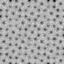

In [4]:
image_path = 'noisy_image_example.png'

# Opening the image to show a preview
Image.open(image_path).convert('L').resize((64,64))

Now we can start and run the denoising pipeline.

In [19]:
denoiser = ImageDenoiser(patch_size=4, threshold=0.5)

results = denoiser.process_image(image_path)

1. Preprocessing image...
   Detected noise level: 0.0031
2. Creating patches...
3. Quantum processing patches...
   Processing patch 0/256
   Processing patch 50/256
   Processing patch 100/256
   Processing patch 150/256
   Processing patch 200/256
   Processing patch 250/256
4. Decoding quantum features...
5. Applying adaptive classical denoising...


This will:
1. Normalize and analyze image noise
2. Slice the image into 4x4 patches
3. Encode each patch into quantum circuits
4. Run Grover's algorithms to extract high-confidence features
5. Decode the quantum measurements into spatial maps
6. Use quantum-guided classical filtering  to denoise the image

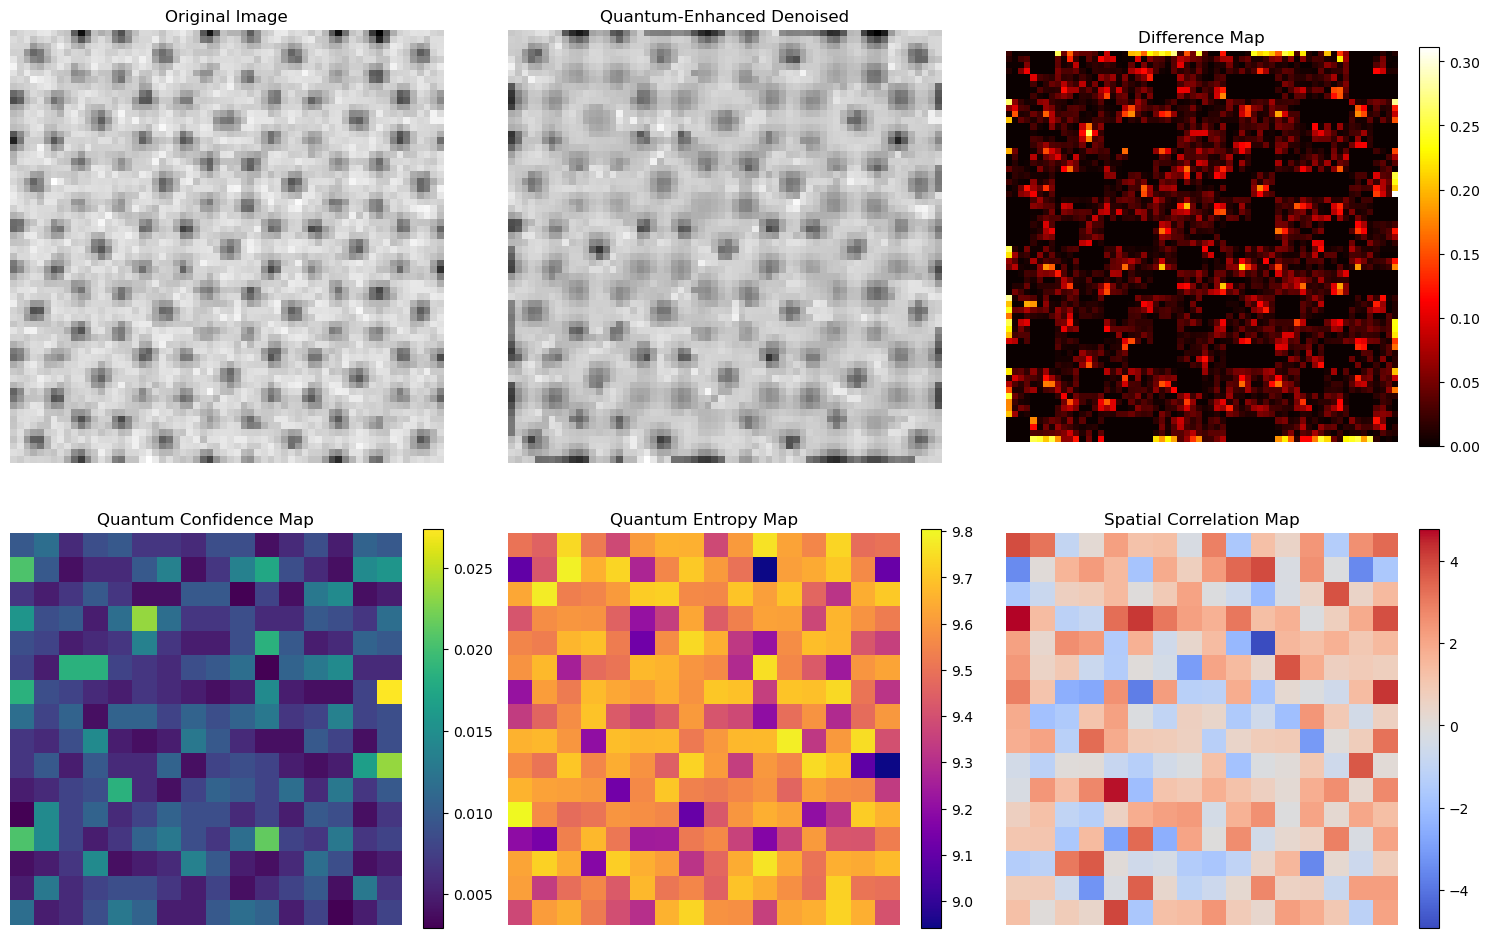


Denoising Performance Metrics:
SNR Improvement: 6.58 dB
Edge Preservation: 0.823
Mean Quantum Confidence: 0.008
Mean Quantum Entropy: 9.534


In [20]:
# Visualize the results
denoiser.visualize_results(results)

## Understanding the Difference Map

### Difference Map (`hot`)
- Shows the absolute difference between the original and denoised images
- Bright regions indicate greater change - typically where noise was removed
- Darker regions show areas that remained relatively untouched
- Ideal maps should highlight denoising **in noisy regions** while preserving **important structures**

## Interpreting the Quantum Feature Maps

The quantum-classical pipeline extracts three key spatial maps from quantum measurements:

### Confidence Map (`viridis`)
- Represents how strongly a patch's quantum measurements concentrated in a dominant outcome
- High values (bright yellow) → high certainty in Grover-based segmentation
- Low values (dark blue) → more diffuse, uncertain quantum measurements
- These guide where classical denoising can be lighter (high confidence) or stronger (low confidence)

### Entropy Map (`plasma`)
- Measures the entropy of the quantum measurement distribution per patch
- Low entropy (dark purple) → highly peaked distributions (more coherent)
- High entropy (bright yellow) → noisy or ambiguous quantum states
- Useful to detect image areas with quantum uncertainty or structureless noise

### Spatial Correlation Map (`coolwarm`)
- Measures how similar the dominant quantum measurement bitstrings are to the original patch
- Values range from -1 (inversely correlated) to +1 (perfectly correlated)
- Red areas → strong alignment between quantum features and image structure
- Blue areas → weak or inverse correlation

These maps are used to inform **adaptive filtering strength** and preserve edges while reducing noise.

We can also print summary metrics. This is already printed automatically by `visualize_results`, but you could repeat it explicitly:

In [21]:
denoiser.calculate_metrics(results)


Denoising Performance Metrics:
SNR Improvement: 6.58 dB
Edge Preservation: 0.823
Mean Quantum Confidence: 0.008
Mean Quantum Entropy: 9.534


## Understanding the Metrics

### Denoising Performance Metrics

QuScope computes two key quantitative metrics:
- **SNR Improvement (dB)**
    - Compares the signal-to-noise ratio *before* and *after* denoising
    - Higher values indicate stronger noise suppression
    - Measured in decibels (dB); >5 dB is often considered significant
    
- **Edge Preservation (correlation coefficient)**
    - Measures how well image edges are preserved after denoising
    - Computed via correlation of Sobel edge maps (original vs. denoised)
    - Ranges from -1 to 1; values close to 1 mean excellent edge retention

Additional metrics like **mean quantum confidence** and **entropy** help assess the quality of the quantum feature extraction process itself.

In [22]:
# Optional: You can inspect quantum features for a single patch

from pprint import pprint
pprint(results['quantum_features'][100])

{'confidence': 0.0048828125,
 'entropy': np.float64(9.632341842186706),
 'spatial_correlation': np.float64(2.5238154058584232),
 'top_states': [('1111001100110000', 5),
                ('1111001100111000', 4),
                ('1111001100100000', 4),
                ('0101001000100000', 4),
                ('0101001100100000', 3)]}


Each patch produces entropy, confidence, dominant measurement states, and spatial correlation. These are decoded into confidence maps for guiding denoising.

## Customization Tips

- Change `patch_size` for finer or coarser quantum analysis
- Modify the threshold used in Grover's oracle to adapt to different noise levels
- Replace the input image with your own microscopy or synthetic data (64x64 recommended)
- Extend `ImageDenoiser` to use different quantum encodings (e.g. amplitude, angle)